### Лабораторная Работа номер 2:  Приближённое  решение уравнения  вида  f(x) = 0  итерационными  методами:  простой итерации, секущих и касательных (комбинированный метод). Вариант 19:   $ 2*sin(x + 0.5) = 1.5 - x $


### I. Вывод всех возможных функций из уравнения $ 2*sin(x + 0.5) = 1.5 - x $ для метода простой итерации:


### Вариант 1: $ x = 1.5 - 2 \sin(x + 0.5) $


### Вариант 2: $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $
1. Начнем с исходного уравнения:
   $  2 \sin(x + 0.5) = 1.5 - x  $
2. Разделим обе части уравнения на 2:
   $ sin(x + 0.5) = \frac{1.5 - x}{2} $
3. Возьмем арксинус от обеих частей уравнения:
   $ x + 0.5 = \arcsin\left(\frac{1.5 - x}{2}\right) $
4. Вычтем 0.5 из обеих частей уравнения:
   $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $


P:\pmr231\AppData\Local\temp\307\ipykernel_518940\2186404577.py:8: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin((1.5 - x) / 2) - 0.5


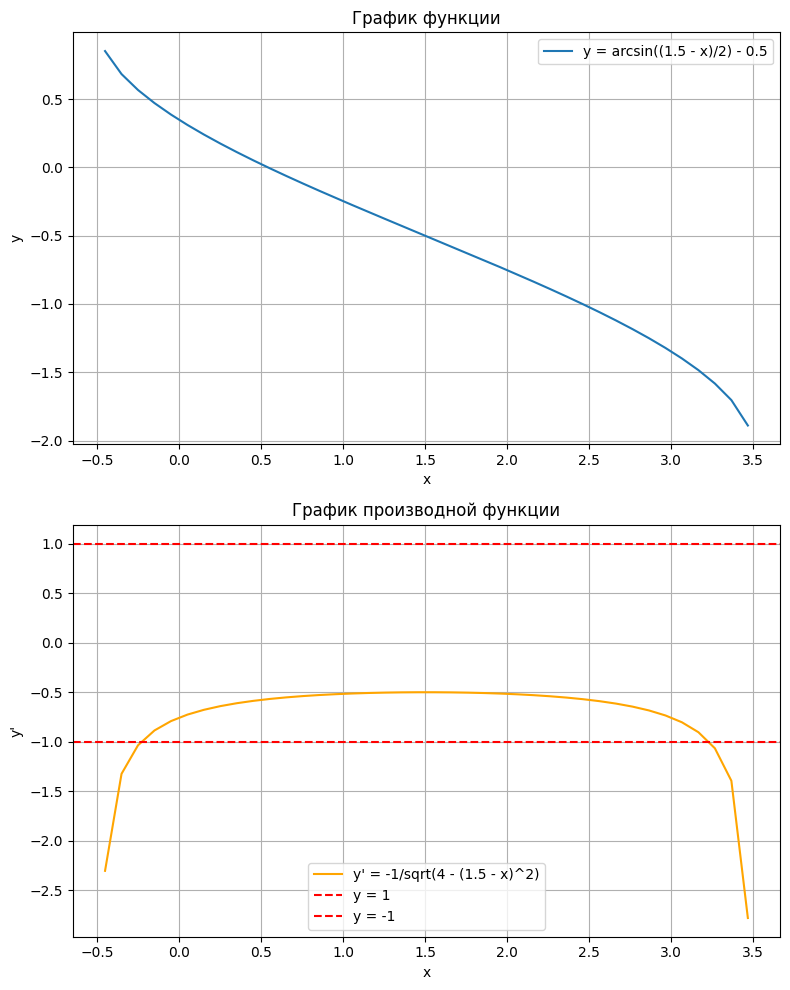

ValueError: could not convert string to float: ''

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import fabs

def variant_2(x):
    """Вариант 2: x = arcsin((1.5 - x)/2) - 0.5"""
    return np.arcsin((1.5 - x) / 2) - 0.5

def derivative_of_function(func, x):
    """Вычисляет приближенную производную функции в точке x."""
    h = 1e-7  # Малое смещение для численной производной
    return (func(x + h) - func(x - h)) / (2 * h)

def show_graphs():
    """
    Показывает графики функции и её производной на отдельных графиках.
    """
    x_values = np.linspace(-10, 10, 200)
    y_values = variant_2(x_values)
    derivative_values = np.array([derivative_of_function(variant_2, x) for x in x_values])

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # График функции
    ax1.plot(x_values, y_values, label='y = arcsin((1.5 - x)/2) - 0.5')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('График функции')

    # График производной
    ax2.plot(x_values, derivative_values, label="y' = -1/sqrt(4 - (1.5 - x)^2)", color='orange')
    ax2.axhline(y=1, color='r', linestyle='--', label='y = 1')
    ax2.axhline(y=-1, color='r', linestyle='--', label='y = -1')
    ax2.set_xlabel('x')
    ax2.set_ylabel("y'")
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('График производной функции')

    plt.tight_layout()
    plt.show()

def calculate_iteration(func, x_initial, tolerance, precision):
    """
    Выполняет метод простых итераций и возвращает результат.
    :param func: Функция для анализа
    :param x_initial: Начальная точка
    :param tolerance: Требуемая точность
    :param precision: Количество знаков после запятой для вывода
    :return: Конечное приближение корня
    """
    x_prev = x_initial
    iter_count = 0
    max_iterations = 100  # Увеличиваем максимальное количество итераций
    print(f"{'Итерация':<10} {'Старый Корень':<18} {'Новый Корень':<18} {'|X(n)-X(n-1)|':<20} {'Сравнение с точностью':<25} {'Статус'}")
    print("=" * 95)
    while True:
        x_next = func(x_prev)
        error = fabs(x_next - x_prev)
        comparison = f"{error:.{precision+1}f} > {tolerance}" if error >= tolerance else f"{error:.{precision+1}f} < {tolerance}"
        status = "продолжаем" if error >= tolerance else "останавливаемся"
        print(f"{iter_count:<10} {x_prev:<18.{precision+1}f} {x_next:<18.{precision+1}f} {error:<20.{precision+1}f} {comparison:<25} {status}")
        if error < tolerance:
            print("Метод сходится!")
            return x_next
        elif iter_count >= max_iterations:  # Проверка на расхождение
            print("Метод расходится!")
            return None
        x_prev = x_next
        iter_count += 1

def main():
    # Этап 1: Показываем графики функции и её производной
    show_graphs()

    # Этап 2: Запрашиваем ввод данных от пользователя
    start_range = float(input("Введите начало диапазона: "))
    end_range = float(input("Введите конец диапазона: "))
    precision_str = input("Введите требуемую точность (например, 0.0001): ")
    precision = len(precision_str.split('.')[1])  # Определяем количество знаков после запятой
    tolerance = float(precision_str)  # Определяем точность исходя из введенного значения

    # Универсальное начальное приближение
    x_initial = (start_range + end_range) / 2

    # Выполнение метода простых итераций
    result = calculate_iteration(variant_2, x_initial, tolerance, precision)
    if result is not None:
        print(f"Конечное приближение корня: {result:.{precision+1}f}")
    else:
        print("Конечное приближение не найдено.")

if __name__ == "__main__":
    main()


P:\pmr231\AppData\Local\temp\360\ipykernel_531688\1046213935.py:7: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin((1.5 - x) / 2) - 0.5


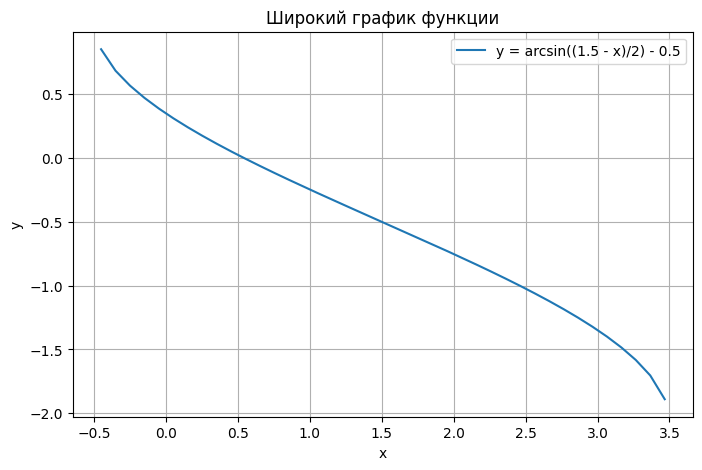

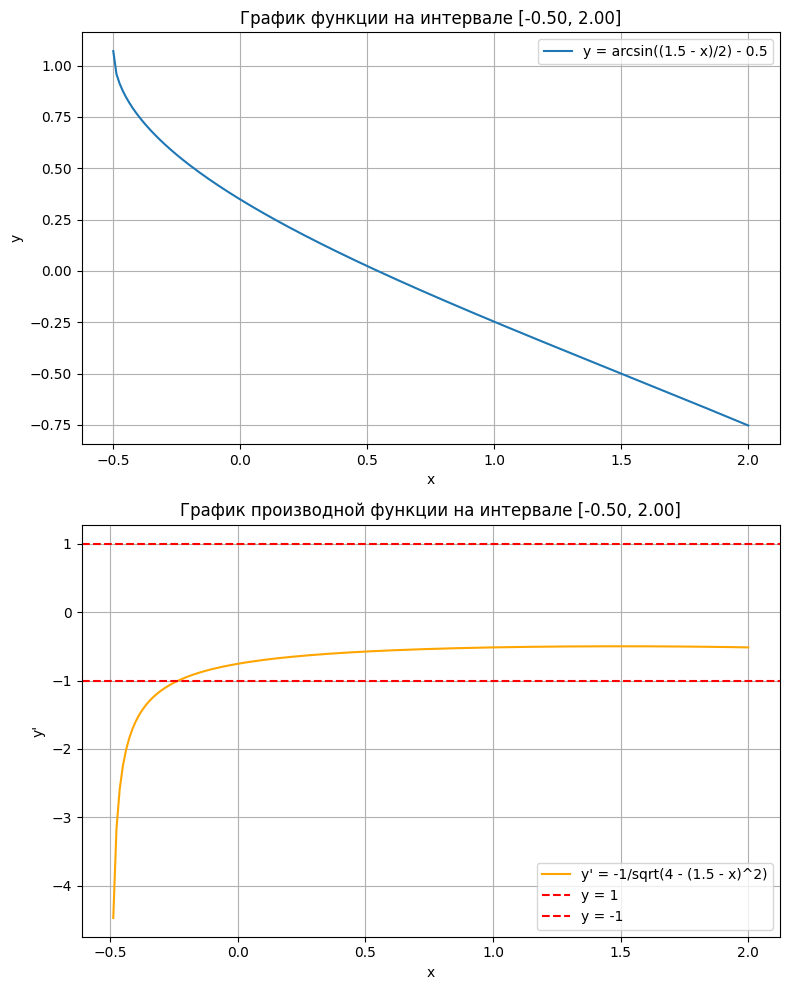

ValueError: could not convert string to float: ''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import fabs

def variant_2(x):
    """Вариант 2: x = arcsin((1.5 - x)/2) - 0.5"""
    return np.arcsin((1.5 - x) / 2) - 0.5

def derivative_of_function(func, x):
    """Вычисляет приближенную производную функции в точке x."""
    h = 1e-7  # Малое смещение для численной производной
    return (func(x + h) - func(x - h)) / (2 * h)

def show_wide_graph():
    """
    Показывает график функции на широком диапазоне.
    """
    x_values = np.linspace(-10, 10, 200)
    y_values = variant_2(x_values)

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, label='y = arcsin((1.5 - x)/2) - 0.5')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Широкий график функции')
    plt.show()

def show_interval_graphs(start_range, end_range):
    """
    Показывает графики функции и её производной на указанном интервале.
    """
    x_values = np.linspace(start_range, end_range, 200)
    y_values = variant_2(x_values)
    derivative_values = np.array([derivative_of_function(variant_2, x) for x in x_values])

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # График функции
    ax1.plot(x_values, y_values, label='y = arcsin((1.5 - x)/2) - 0.5')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title(f'График функции на интервале [{start_range:.2f}, {end_range:.2f}]')

    # График производной
    ax2.plot(x_values, derivative_values, label="y' = -1/sqrt(4 - (1.5 - x)^2)", color='orange')
    ax2.axhline(y=1, color='r', linestyle='--', label='y = 1')
    ax2.axhline(y=-1, color='r', linestyle='--', label='y = -1')
    ax2.set_xlabel('x')
    ax2.set_ylabel("y'")
    ax2.legend()
    ax2.grid(True)
    ax2.set_title(f'График производной функции на интервале [{start_range:.2f}, {end_range:.2f}]')

    plt.tight_layout()
    plt.show()

def calculate_iteration(func, x_initial, tolerance, precision):
    """
    Выполняет метод простых итераций и возвращает результат.
    :param func: Функция для анализа
    :param x_initial: Начальная точка
    :param tolerance: Требуемая точность
    :param precision: Количество знаков после запятой для вывода
    :return: Конечное приближение корня
    """
    x_prev = x_initial
    iter_count = 0
    max_iterations = 100  # Увеличиваем максимальное количество итераций
    print(f"{'Итерация':<10} {'Старый Корень':<18} {'Новый Корень':<18} {'|X(n)-X(n-1)|':<20} {'Сравнение с точностью':<25} {'Статус'}")
    print("=" * 95)
    while True:
        x_next = func(x_prev)
        error = fabs(x_next - x_prev)
        comparison = f"{error:.{precision+1}f} > {tolerance}" if error >= tolerance else f"{error:.{precision+1}f} < {tolerance}"
        status = "продолжаем" if error >= tolerance else "останавливаемся"
        print(f"{iter_count:<10} {x_prev:<18.{precision+1}f} {x_next:<18.{precision+1}f} {error:<20.{precision+1}f} {comparison:<25} {status}")
        if error < tolerance:
            print("Метод сходится!")
            return x_next
        elif iter_count >= max_iterations:  # Проверка на расхождение
            print("Метод расходится!")
            return None
        x_prev = x_next
        iter_count += 1

def main():
    # Этап 1: Показ широкого графика функции
    show_wide_graph()

    # Этап 2: Ввод интервала для уточнения графиков
    start_range = float(input("Введите начало интервала для уточнения графиков: "))
    end_range = float(input("Введите конец интервала для уточнения графиков: "))

    # Этап 3: Показ графиков на выбранном интервале
    show_interval_graphs(start_range, end_range)

    # Этап 4: Запрос ввода начальных данных для расчёта
    start_point = float(input("Введите начальную точку для расчета: "))
    precision_str = input("Введите требуемую точность (например, 0.0001): ")
    precision = len(precision_str.split('.')[1])  # Определяем количество знаков после запятой
    tolerance = float(precision_str)  # Определяем точность исходя из введенного значения

    # Этап 5: Расчёт методом простых итераций
    result = calculate_iteration(variant_2, start_point, tolerance, precision)
    if result is not None:
        print(f"Конечное приближение корня: {result:.{precision+1}f}")
    else:
        print("Конечное приближение не найдено.")

if __name__ == "__main__":
    main()


## Метод хорд и касательных (комбинированный)

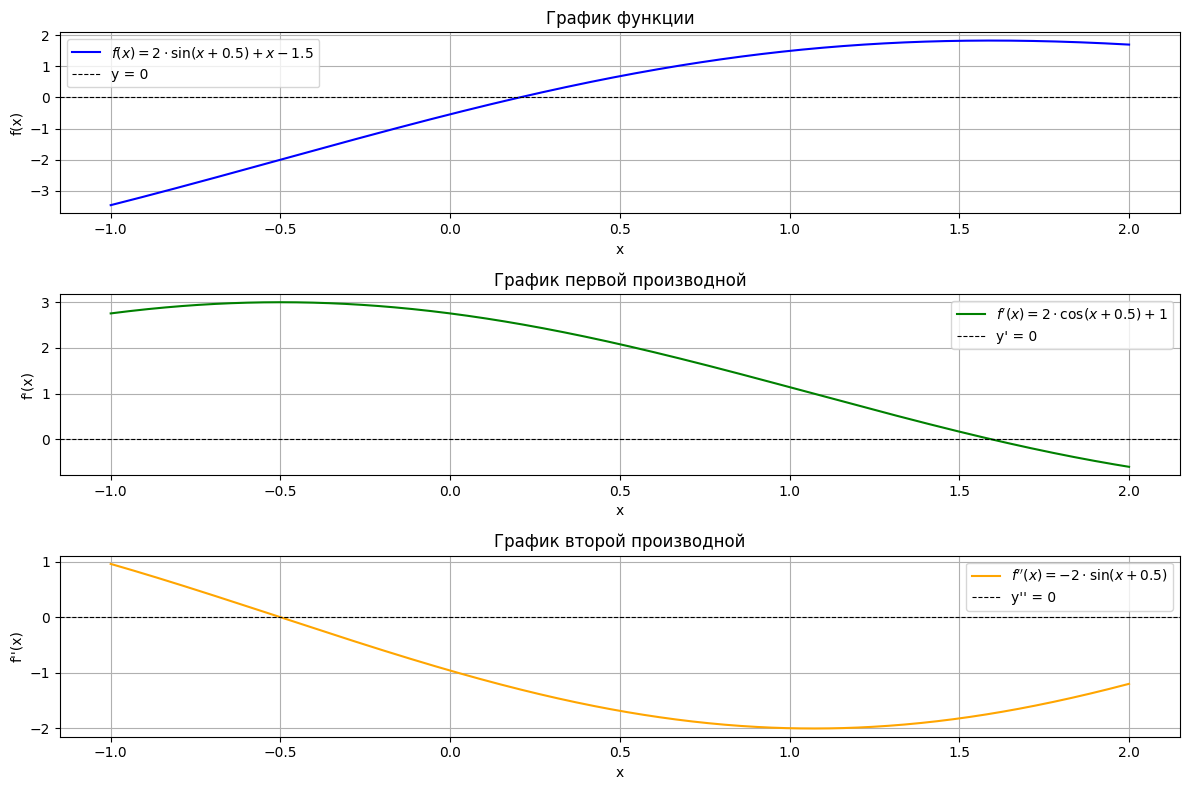

Ошибка: could not convert string to float: ''


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x)
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Определяем производную функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Определяем вторую производную функции f''(x)
def d2f(x):
    return -2 * np.sin(x + 0.5)

# Функция для построения графиков функции, её первой и второй производных
def plot_functions():
    x = np.linspace(-1, 2, 500)
    y = f(x)
    dy = df(x)
    d2y = d2f(x)

    plt.figure(figsize=(12, 8))

    # График функции
    plt.subplot(3, 1, 1)
    plt.plot(x, y, label=r"$f(x) = 2 \cdot \sin(x + 0.5) + x - 1.5$", color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y = 0")
    plt.title("График функции")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)

    # График первой производной
    plt.subplot(3, 1, 2)
    plt.plot(x, dy, label=r"$f'(x) = 2 \cdot \cos(x + 0.5) + 1$", color="green")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y' = 0")
    plt.title("График первой производной")
    plt.xlabel("x")
    plt.ylabel("f'(x)")
    plt.legend()
    plt.grid(True)

    # График второй производной
    plt.subplot(3, 1, 3)
    plt.plot(x, d2y, label=r"$f''(x) = -2 \cdot \sin(x + 0.5)$", color="orange")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y'' = 0")
    plt.title("График второй производной")
    plt.xlabel("x")
    plt.ylabel("f''(x)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Комбинированный метод хорд и касательных
def combined_method(a, b, tol):
    """ Комбинированный метод хорд и касательных. :param a: Начало интервала :param b: Конец интервала :param tol: Точность :return: Приближенное значение корня """
    # Проверка изменения знака
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b].")

    # Проверка производной
    if df(a) == 0 or df(b) == 0:
        raise ValueError("Производная равна нулю на границах интервала.")

    print("Начинаем комбинированный метод хорд и касательных:")
    iteration = 0
    digits = int(np.ceil(-np.log10(tol))) + 1  # Количество знаков после запятой для вывода
    while abs(b - a) > tol:
        # Метод хорд (обновление левой границы)
        a_new = a - f(a) * (b - a) / (f(b) - f(a))

        # Метод касательных (обновление правой границы)
        b_new = b - f(b) / df(b)

        # Вывод отчета по текущей итерации
        print(f"Итерация {iteration}: a = {a_new:.{digits}f}, b = {b_new:.{digits}f}, |b - a| = {abs(b_new - a_new):.{digits}f}")

        # Обновляем границы интервала
        a, b = a_new, b_new
        iteration += 1

    # Возвращаем среднее значение между границами как корень
    root = (a + b) / 2
    return root

def main():
    # Построение графиков функции, её первой и второй производных
    plot_functions()

    # Ввод данных пользователем
    try:
        a = float(input("Введите начало интервала (a): "))
        b = float(input("Введите конец интервала (b): "))
        tol = float(input("Введите точность (например, 0.0001): "))

        # Проверка, что точность положительна
        if tol <= 0:
            raise ValueError("Точность должна быть положительным числом.")

        # Находим корень
        root = combined_method(a, b, tol)
        print(f"\nКорень уравнения: {root:.6f}")
    except ValueError as e:
        print(f"Ошибка: {e}")

if __name__ == "__main__":
    main()
